# Installing Dependencies and importing Libraries

In [ ]:
%%bash
sudo add-apt-repository ppa:alex-p/tesseract-ocr-devel
sudo apt-get update
sudo apt-get install -y tesseract-ocr tesseract-ocr-ara libtesseract-dev libleptonica-dev

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://ppa.launchpadcontent.net/alex-p/tesseract-ocr-devel/ubuntu jammy InRelease [18.3 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
!pip install pytesseract
!pip install pillow
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
import zipfile
from PIL import Image, ImageOps, ImageEnhance
import pytesseract
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import shutil
import os
import tempfile
import cv2
import numpy as np
import gradio as gr

# Setting Up the Training Environment and Tesseract

# Clone Tesstrain repository to use it for training

In [ ]:
!git clone --depth 1 https://github.com/RamezCh/tesstrain.git

Cloning into 'tesstrain'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 35 (delta 3), reused 10 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 5.29 MiB | 12.85 MiB/s, done.
Resolving deltas: 100% (3/3), done.


## Prepare training files and start model

In [ ]:
!mkdir tessdata
%cd ./tessdata
!wget https://github.com/tesseract-ocr/tessdata_best/raw/main/ara.traineddata
%cd ../tesstrain

/content/tessdata
--2025-04-26 10:11:44--  https://github.com/tesseract-ocr/tessdata_best/raw/main/ara.traineddata
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/ara.traineddata [following]
--2025-04-26 10:11:44--  https://raw.githubusercontent.com/tesseract-ocr/tessdata_best/main/ara.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12603724 (12M) [application/octet-stream]
Saving to: ‘ara.traineddata’

ara.traineddata     100%[===================>]  12.02M  --.-KB/s    in 0.1s    

2025-04-26 10:11:44 (104 MB/s) - ‘ara.traineddata’ saved [12603724/12

In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 4.4 MB/s eta 0:00:00


# Un-Packing our Custom Data from Zip File (first upload it)

In [ ]:
%cd ../

/content


## UnZip the data

In [ ]:
# Step 1: Unzip Arabic_Text_Extractor.zip directly into the current directory
with zipfile.ZipFile('Data_until_now.zip', 'r') as zip_ref:
    zip_ref.extractall()

print("Unzipped successfully into the current directory!")

Unzipped successfully into the current directory!


In [ ]:
# Step 1: Unzip Arabic_Text_Extractor.zip directly into the current directory
with zipfile.ZipFile('RAA_CUSTOM_DATASET.zip', 'r') as zip_ref:
    zip_ref.extractall()

print("Unzipped successfully into the current directory!")

Unzipped successfully into the current directory!


## Convert JPEG into PNG for Tesseract

In [ ]:
# Step 1: Define the input folder
input_folder = 'Data_until_now'  # Folder containing .jpeg images

# Step 2: Convert .jpeg to .png and delete the original .jpeg files
for filename in os.listdir(input_folder):
    if filename.endswith('.jpeg') or filename.endswith('.jpg'):
        # Open the .jpeg image
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)

        # Define the output path with .png extension
        output_filename = os.path.splitext(filename)[0] + '.png'
        output_path = os.path.join(input_folder, output_filename)

        # Save the image in .png format
        img.save(output_path, format='PNG')
        print(f"Converted {filename} to {output_filename}")

        # Delete the original .jpeg file
        os.remove(img_path)
        print(f"Deleted {filename}")

print("All images converted and original .jpeg files deleted successfully!")

Converted AHTD3A0995_Para4_1.jpg to AHTD3A0995_Para4_1.png
Deleted AHTD3A0995_Para4_1.jpg
Converted AHTD3A1001_Para2_2.jpg to AHTD3A1001_Para2_2.png
Deleted AHTD3A1001_Para2_2.jpg
Converted AHTD3A1001_Para2_3.jpg to AHTD3A1001_Para2_3.png
Deleted AHTD3A1001_Para2_3.jpg
Converted AHTD3A0997_Para3_6.jpg to AHTD3A0997_Para3_6.png
Deleted AHTD3A0997_Para3_6.jpg
Converted AHTD3A0997_Para2_3.jpg to AHTD3A0997_Para2_3.png
Deleted AHTD3A0997_Para2_3.jpg
Converted AHTD3A0995_Para1_3.jpg to AHTD3A0995_Para1_3.png
Deleted AHTD3A0995_Para1_3.jpg
Converted AHTD3A0997_Para2_1.jpg to AHTD3A0997_Para2_1.png
Deleted AHTD3A0997_Para2_1.jpg
Converted sky.jpeg to sky.png
Deleted sky.jpeg
Converted cat.jpeg to cat.png
Deleted cat.jpeg
Converted AHTD3A0997_Para3_3.jpg to AHTD3A0997_Para3_3.png
Deleted AHTD3A0997_Para3_3.jpg
Converted wind.jpeg to wind.png
Deleted wind.jpeg
Converted coffe.jpeg to coffe.png
Deleted coffe.jpeg
Converted AHTD3A0995_Para1_5.jpg to AHTD3A0995_Para1_5.png
Deleted AHTD3A0995_Para1

In [ ]:
# Step 1: Define the input folder
input_folder = 'RAA_CUSTOM_DATASET'  # Root folder containing images

# Supported image extensions to convert (add more if needed)
supported_extensions = ('.jpeg', '.jpg', '.bmp', '.tiff', '.gif', '.webp')

# Step 2: Recursively convert images to PNG and delete originals
for root, dirs, files in os.walk(input_folder):
    for filename in files:
        # Check if file has an extension we want to convert
        if filename.lower().endswith(supported_extensions):
            # Get full file path
            img_path = os.path.join(root, filename)

            try:
                # Open the image
                img = Image.open(img_path)

                # Define the output path with .png extension
                output_filename = os.path.splitext(filename)[0] + '.png'
                output_path = os.path.join(root, output_filename)

                # Save the image in .png format
                img.save(output_path, format='PNG')
                print(f"Converted {img_path} to {output_path}")

                # Close the image file
                img.close()

                # Delete the original file
                os.remove(img_path)
                print(f"Deleted original {img_path}")

            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

print("Conversion process completed!")

Converted RAA_CUSTOM_DATASET/Arabic_Sentences/الأمة العربية الإسلامية وحسن النية وحده قد يبعثر كثيراً/oumaarabyi.jpeg to RAA_CUSTOM_DATASET/Arabic_Sentences/الأمة العربية الإسلامية وحسن النية وحده قد يبعثر كثيراً/oumaarabyi.png
Deleted original RAA_CUSTOM_DATASET/Arabic_Sentences/الأمة العربية الإسلامية وحسن النية وحده قد يبعثر كثيراً/oumaarabyi.jpeg
Converted RAA_CUSTOM_DATASET/Arabic_Sentences/ان تصميم الحرف العربي للطباعة يتطلب وعيا بتراث/mvb5.jpeg to RAA_CUSTOM_DATASET/Arabic_Sentences/ان تصميم الحرف العربي للطباعة يتطلب وعيا بتراث/mvb5.png
Deleted original RAA_CUSTOM_DATASET/Arabic_Sentences/ان تصميم الحرف العربي للطباعة يتطلب وعيا بتراث/mvb5.jpeg
Converted RAA_CUSTOM_DATASET/Arabic_Sentences/ان تصميم الحرف العربي للطباعة يتطلب وعيا بتراث/tasmeemhaza7arf.jpeg to RAA_CUSTOM_DATASET/Arabic_Sentences/ان تصميم الحرف العربي للطباعة يتطلب وعيا بتراث/tasmeemhaza7arf.png
Deleted original RAA_CUSTOM_DATASET/Arabic_Sentences/ان تصميم الحرف العربي للطباعة يتطلب وعيا بتراث/tasmeemhaza7arf.jpe

## Move the data into Tesstrain/data/Arabic_Text_Extractor-ground-truth

Note: Execute only after tesstrain has been cloned

In [ ]:
# Define source and destination folders
source_folder = 'Data_until_now'
destination_folder = 'tesstrain/data/Arabic_Text_Extractor-ground-truth'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Move all contents of Tcor to the destination folder
for item in os.listdir(source_folder):
    source_item = os.path.join(source_folder, item)
    destination_item = os.path.join(destination_folder, item)
    shutil.move(source_item, destination_item)
    print(f"Moved {source_item} to {destination_item}")

print("All contents moved successfully!")

Moved Data_until_now/AHTD3A0995_Para1_5.gt.txt to tesstrain/data/Arabic_Text_Extractor-ground-truth/AHTD3A0995_Para1_5.gt.txt
Moved Data_until_now/samer.png to tesstrain/data/Arabic_Text_Extractor-ground-truth/samer.png
Moved Data_until_now/AHTD3A0997_Para2_3.png to tesstrain/data/Arabic_Text_Extractor-ground-truth/AHTD3A0997_Para2_3.png
Moved Data_until_now/AHTD3A0989_Para4_4.png to tesstrain/data/Arabic_Text_Extractor-ground-truth/AHTD3A0989_Para4_4.png
Moved Data_until_now/car.png to tesstrain/data/Arabic_Text_Extractor-ground-truth/car.png
Moved Data_until_now/garden.png to tesstrain/data/Arabic_Text_Extractor-ground-truth/garden.png
Moved Data_until_now/AHTD3A0989_Para2_1.gt.txt to tesstrain/data/Arabic_Text_Extractor-ground-truth/AHTD3A0989_Para2_1.gt.txt
Moved Data_until_now/AHTD3A0995_Para1_4.png to tesstrain/data/Arabic_Text_Extractor-ground-truth/AHTD3A0995_Para1_4.png
Moved Data_until_now/AHTD3A0994_Para3_1.gt.txt to tesstrain/data/Arabic_Text_Extractor-ground-truth/AHTD3A09

In [ ]:
%cd ./tesstrain

/content/tesstrain


In [ ]:
!make generate-gt-from-folder-name INPUT_DIR=../RAA_CUSTOM_DATASET/Arabic_Letters OUTPUT_DIR=./data/Arabic_Text_Extractor

You are using make version: 4.3
Ground-Truth generation beginning...
Processed: baynama2.png -> بينما
Processed: baynama3.png -> بينما
Processed: baynama.png -> بينما
Processed: ta7t3.png -> تحت
Processed: ta7t2.png -> تحت
Processed: ta7yt.png -> تحت
Processed: sama23.png -> السماء
Processed: sama2.png -> السماء
Processed: sama22.png -> السماء
Processed: dh10.png -> ذ
Processed: dh2.png -> ذ
Processed: zth18.png -> ذ
Processed: dh.png -> ذ
Processed: zad10.png -> ذ
Processed: dh3.png -> ذ
Processed: sya3.png -> سي
Processed: d.png -> د
Processed: da10.png -> د
Processed: d10.png -> د
Processed: d18.png -> د
Processed: d3.png -> د
Processed: d2.png -> د
Processed: qa11.png -> ق
Processed: qa10.png -> ق
Processed: q8.png -> ق
Processed: mxjxnhh.png -> ق
Processed: qa15.png -> ق
Processed: qa4.png -> ق
Processed: qa3.png -> ق
Processed: qa6.png -> ق
Processed: q7.png -> ق
Processed: qa2.png -> ق
Processed: qa.png -> ق
Processed: qa19.png -> ق
Processed: q9.png -> ق
Processed: qa14.png -> 

In [ ]:
!make generate-gt-from-folder-name INPUT_DIR=../RAA_CUSTOM_DATASET/Arabic_Sentences OUTPUT_DIR=./data/Arabic_Text_Extractor

You are using make version: 4.3
Ground-Truth generation beginning...
Processed: oumaarabyi.png -> الأمة العربية الإسلامية وحسن النية وحده قد يبعثر كثيراً
Processed: ahmdghz9.08.43.png -> ان تصميم الحرف العربي للطباعة يتطلب وعيا بتراث
Processed: mvb5.png -> ان تصميم الحرف العربي للطباعة يتطلب وعيا بتراث
Processed: tasmeemhaza7arf.png -> ان تصميم الحرف العربي للطباعة يتطلب وعيا بتراث
Processed: IMG-20250401-WA0098.png -> صض طظ عغ فق كل
Processed: sadda2.png -> صض طظ عغ فق كل
Processed: jhgvcx.png -> صض طظ عغ فق كل
Processed: sadaqazad3a8fqkl.png -> صض طظ عغ فق كل
Processed: sdfgh8.09.12.png -> صض طظ عغ فق كل
Processed: bxzf8.06.19.png -> من الطاقات والوقت دونما فائدة
Processed: mintaqat.png -> من الطاقات والوقت دونما فائدة
Processed: ashjar.png -> الأشجار برية مؤيد شؤون
Processed: mjhtr.png -> الأشجار برية مؤيد شؤون
Processed: lkjhgf8.08.13.png -> الأشجار برية مؤيد شؤون
Processed: IMG-20250401-WA0102.png -> الأشجار برية مؤيد شؤون
Processed: ashjarbaryamoaydasho2on.png -> الأشجار برية مؤي

# Train the Model on the data

## Option 1: Continue from Previous traineddata

In [ ]:
!make training MODEL_NAME=Arabic_Text_Extractor \
    START_MODEL=Arabic_Text_Extractor_New \
    TESSDATA=../tessdata \
    MAX_ITERATIONS=8000 \
    LEARNING_RATE=0.0001 \
    LANG_TYPE=RTL \
    -l ara

You are using make version: 4.3
combine_tessdata -u ../tessdata//Arabic_Text_Extractor_New.traineddata data/Arabic_Text_Extractor_New/Arabic_Text_Extractor
Failed to read ../tessdata//Arabic_Text_Extractor_New.traineddata
make: *** [Makefile:242: data/Arabic_Text_Extractor_New/Arabic_Text_Extractor.lstm-unicharset] Error 1


## Option 2: Start from tessbest trained data

In [ ]:
!make training \
    TESSDATA=/content/tessdata \
    MODEL_NAME=Arabic_Text_Extractor \
    START_MODEL=ara \
    MAX_ITERATIONS=8000 \
    PSM=7 \
    LEARNING_RATE=0.0001 \
    LANG_TYPE=RTL \
    -l ara

You are using make version: 4.3
tesseract "data/Arabic_Text_Extractor-ground-truth/zalyk2.png" data/Arabic_Text_Extractor-ground-truth/zalyk2 --psm 7 lstm.train
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
tesseract "data/Arabic_Text_Extractor-ground-truth/tafyel2.png" data/Arabic_Text_Extractor-ground-truth/tafyel2 --psm 7 lstm.train
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
tesseract "data/Arabic_Text_Extractor-ground-truth/ma32.png" data/Arabic_Text_Extractor-ground-truth/ma32 --psm 7 lstm.train
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
tesseract "data/Arabic_Text_Extractor-ground-truth/baynama3.png" data/Arabic_Text_Extractor-ground-truth/baynama3 --psm 7 lstm.train
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
tesseract "data/Arabic_Text_Extractor-ground-truth/ww.png" data/Arabic_Text_Extractor-ground-truth/ww --psm 7 lstm.train
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
tesseract "data/Arabic_Text_Extractor-ground-truth/yas

In [ ]:
!make plot MODEL_NAME=Arabic_Text_Extractor

You are using make version: 4.3
make: Nothing to be done for 'plot'.


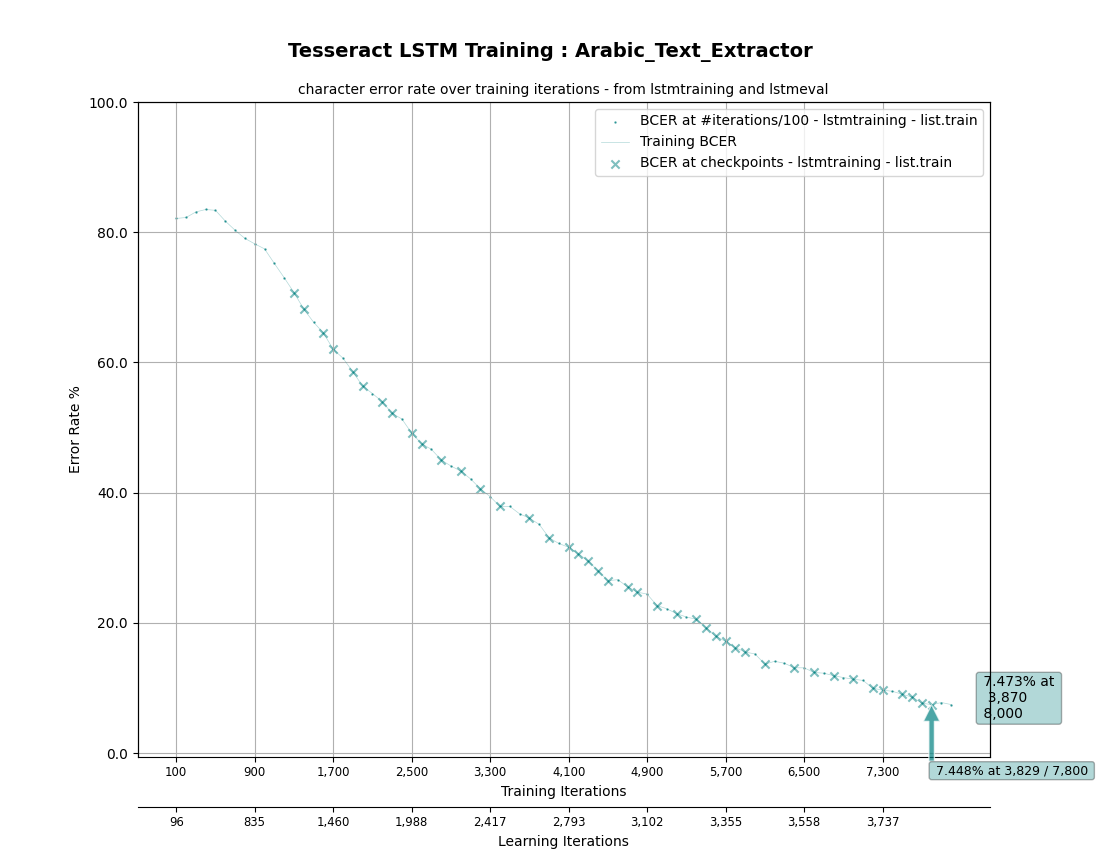

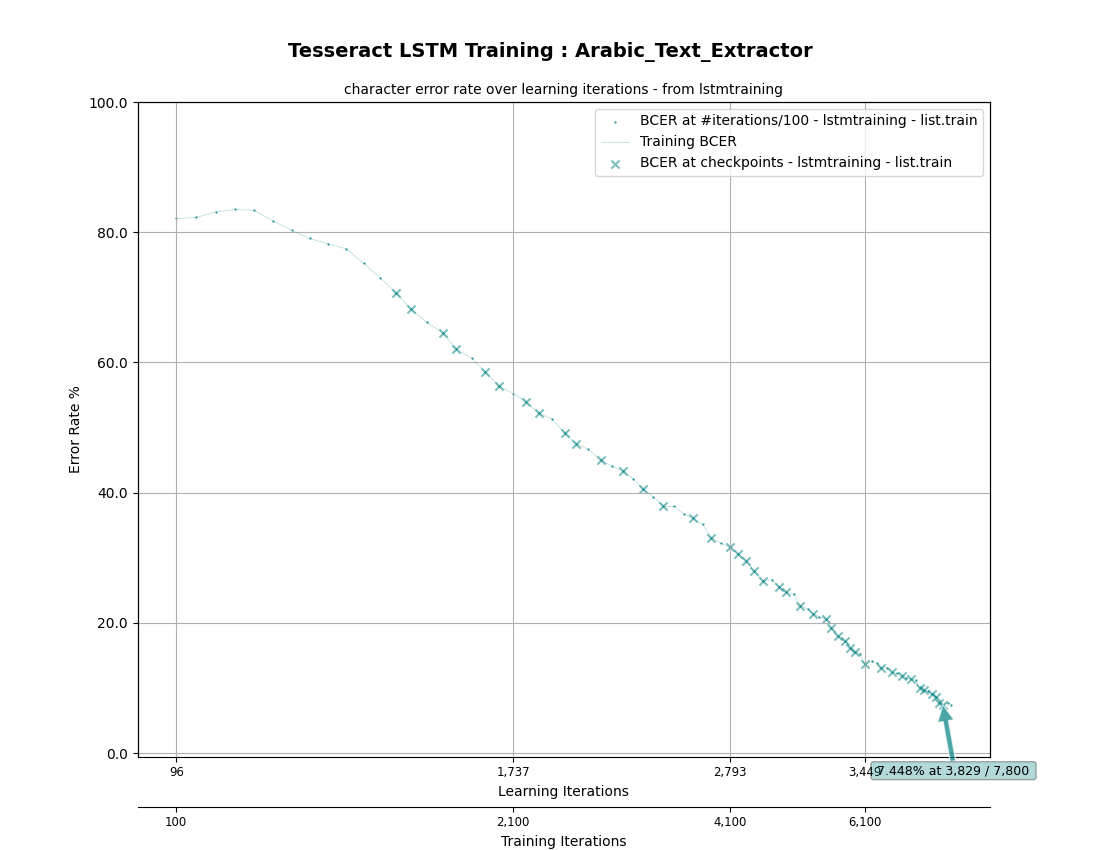

# Move Model weights resulted from training to tessdata to use in predictions

In [ ]:
%cd data

/content/tesstrain/data


In [ ]:
!cp Arabic_Text_Extractor.traineddata /content/tessdata

# Testing the trained Model

## Creating PSM mode detector, is it a block of text? a single line? an entire page?

In [ ]:
def get_psm_mode(image):
    """
    Automatically determines the best PSM mode based on image analysis.
    """
    # Convert to OpenCV format
    image_cv = np.array(image)
    gray = image_cv

    # Apply threshold to segment text
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours (text blocks)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Heuristic for selecting PSM mode
    num_contours = len(contours)

    if num_contours < 5:
        return 6  # Paragraph mode
    elif num_contours < 15:
        return 7  # Single-line mode
    elif num_contours > 50:
        return 11  # Sparse text mode
    else:
        return 3  # Default auto mode

## Create testing function

In [ ]:
def testModel(imgURL, modelName, tdLocation):
    """
    This function loads the traineddata from Tesseract training and utilizes it to extract text from images.
    It shows the pre-processed image.

    # Parameters:
    imgURL: the directory or the URL of the image
    modelName: the name of the model or simply what is written before .traineddata
    tdLocation: the path to the traineddata file

    # Example usage:
    testModel("https://example.com/path/to/image.jpg", "ara", "/content/tessdata")
    testModel(r"/content/khatt/validate_data/AHTD3A0001_Para1_3.jpg", "ara", "/content/tessdata")
    """
    # Load image from URL or local path
    if imgURL.startswith(('http://', 'https://')):
        response = requests.get(imgURL)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(imgURL)

    # Pre-process the image
    img_processed = img.copy()
    # Turn image into greyscale
    img_processed = img_processed.convert('L')
    # Add a 10px white border
    img_processed = ImageOps.expand(img_processed, border=50, fill='white')
    # Save the pre-processed image as a PNG file
    png_path = "preprocessed_image.png"
    img_processed.save(png_path, format="PNG", dpi=(300, 300))

    # Display the pre-processed image
    plt.figure(figsize=(6, 6))
    plt.imshow(img_processed, cmap="gray")
    plt.title("Pre-processed Image (PNG)")
    plt.axis('off')
    plt.show()

    # Get dynamic PSM mode
    psm_mode = get_psm_mode(img_processed)

    # Perform OCR on the pre-processed PNG image
    text = pytesseract.image_to_string(
        png_path,
        lang=modelName,
        config = f'--tessdata-dir {tdLocation} --oem 1 --psm {psm_mode}'
    )

    print("Extracted Text:\n", text)

    # Clean up the temporary PNG file
    os.remove(png_path)

    return text

After training there will be a .traineddata file in tesstrain/data/ folder and we movie it to tessdata to place it there and use it. But how do we use it? by putting its name in the lang parameter in the pytesseract function. The lang parameter takes the name of the .traineddata file for e.g. test.traineddata lang="test"

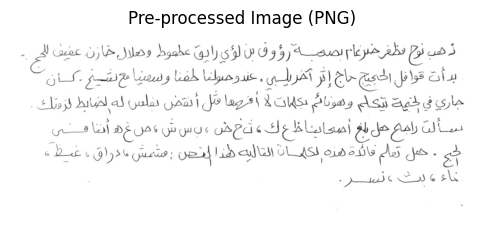

Extracted Text:
 ذهب فو ع نطغ ر ضرعمام صصبة رؤوف لى لزي رايق نطموط و حلال حمازن عفيف
بدأت قوافل الحجيج حاج إقر اتفررليبي. عند وحصولفا طفنا واسمنيا مع لتي كان
جاري في طنيت تتكلم وهونائم كلمات لا أضهها قثل أنتض مفلس له لضابط لزفك.
سألت راجح حمل ابغ اأصموانبناظ غك, نعهشض , ي لنل نت اأمرغه أنناا فص
خع . حمل تعالم قالاة هذم الكلمان التاليي هذا لنحد ,عتمش وادراق: غميظه
خا, لث, نسر. ض(



'ذهب فو ع نطغ ر ضرعمام صصبة رؤوف لى لزي رايق نطموط و حلال حمازن عفيف\nبدأت قوافل الحجيج حاج إقر اتفررليبي. عند وحصولفا طفنا واسمنيا مع لتي كان\nجاري في طنيت تتكلم وهونائم كلمات لا أضهها قثل أنتض مفلس له لضابط لزفك.\nسألت راجح حمل ابغ اأصموانبناظ غك, نعهشض , ي لنل نت اأمرغه أنناا فص\nخع . حمل تعالم قالاة هذم الكلمان التاليي هذا لنحد ,عتمش وادراق: غميظه\nخا, لث, نسر. ض(\n'

In [ ]:
testModel("https://user-images.githubusercontent.com/47701869/173181877-221cc557-4426-44d1-b5bc-2aa4ff18b7bc.jpg", "Arabic_Text_Extractor", "/content/tessdata")

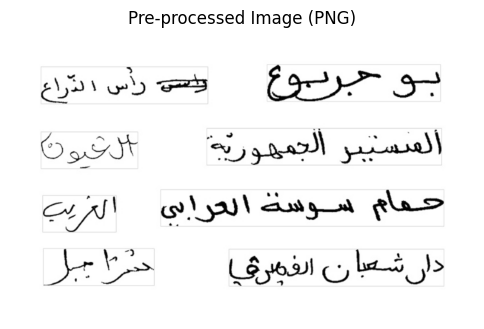

Extracted Text:
 بيق بروعغ ضح بأس الدراع
حمام موسة الحرادي الزيب



'بيق بروعغ ضح بأس الدراع\nحمام موسة الحرادي الزيب\n'

In [ ]:
testModel("https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs10032-019-00339-8/MediaObjects/10032_2019_339_Fig11_HTML.png", "Arabic_Text_Extractor", "/content/tessdata")

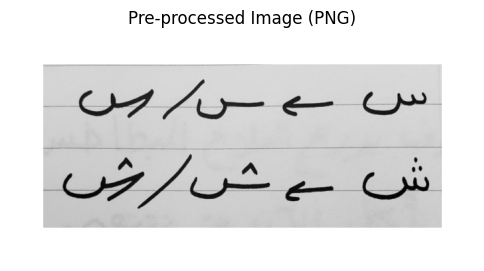

Extracted Text:
 س ويي سرر صشصسس



'س ويي سرر صشصسس\n'

In [ ]:
testModel("https://datalab.flitto.com/en/company/blog/wp-content/uploads/image-8-600x245.png", "Arabic_Text_Extractor", "/content/tessdata")

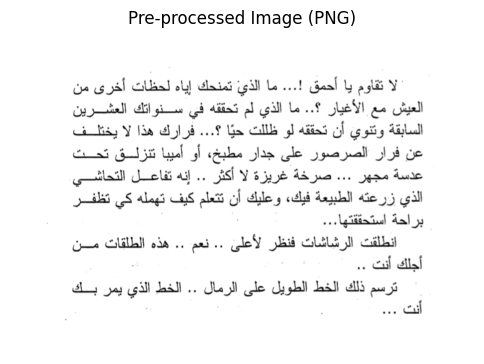

Extracted Text:
 لا تقاوم يا أحمق !... ما الذي تمنحك إياه لحظات أخرى من
العيش مع الأغيار ؟.. ما الذي لم تحققه في سنواتك العشرين
السابقة وتنوي أن تحققه لو ظللت حيًا ؟... فرارك هذا لا يخلف
عن فرار الصرصور على جدار مطبخ أو أميبا تتذزلق تحث
عدسة مجهر ... صرخة غريزة لا أكثر .. إنه تفاعل التحاسي
الذي زرعته الطبيعة فيك, وعليك أن نتعلم كيف تهمله كي نظفر
انطلقت الرشاشات فنظر لأعلى .. نعم .. هذه الطلقاتة من
ترسم ذلك الخط الطويل على الرمال .. الخط الذي يمربك



'لا تقاوم يا أحمق !... ما الذي تمنحك إياه لحظات أخرى من\nالعيش مع الأغيار ؟.. ما الذي لم تحققه في سنواتك العشرين\nالسابقة وتنوي أن تحققه لو ظللت حيًا ؟... فرارك هذا لا يخلف\nعن فرار الصرصور على جدار مطبخ أو أميبا تتذزلق تحث\nعدسة مجهر ... صرخة غريزة لا أكثر .. إنه تفاعل التحاسي\nالذي زرعته الطبيعة فيك, وعليك أن نتعلم كيف تهمله كي نظفر\nانطلقت الرشاشات فنظر لأعلى .. نعم .. هذه الطلقاتة من\nترسم ذلك الخط الطويل على الرمال .. الخط الذي يمربك\n'

In [ ]:
testModel("https://andreasmhallberg.github.io/images/2017-03-03/utopia.png", "Arabic_Text_Extractor", "/content/tessdata")

# Deploying Model for EndUsers

## Define Website structure

In [ ]:
def gradio_interface(img_url, img_file):
    try:
        if img_file:
            input_img = img_file
            display_img = img_file
        elif img_url:
            input_img = img_url
            display_img = img_url
        else:
            return "No image provided", None, None, None

        # Extract text from image
        extracted_text = testModel(input_img, "Arabic_Text_Extractor", "/content/tessdata")

        # Create temporary file with actual extracted content
        temp_dir = tempfile.mkdtemp()
        text_file_path = os.path.join(temp_dir, "extracted_text.txt")
        with open(text_file_path, "w", encoding="utf-8") as file:
            file.write(extracted_text)  # Write the actual extracted text

        # Create HTML display with the actual extracted text
        extracted_text_html = f"""
        <div style='
            font-weight: bold;
            white-space: pre-wrap;
            border: 1px solid #ddd;
            padding: 15px;
            border-radius: 5px;
            background: #f9f9f9;
            margin-bottom: 15px;
        '>
            {extracted_text}
        </div>
        """

        return display_img, extracted_text_html, text_file_path, gr.update(visible=True)

    except Exception as e:
        error_msg = f"<div style='color: red; font-weight: bold;'>Error: {str(e)}</div>"
        return None, error_msg, None, gr.update(visible=False)

def clear_inputs():
    return "", None, "", None, gr.update(visible=False)

with gr.Blocks(css="""
    .orange-button { background-color: orange !important; color: white !important; }
    .download-btn { background-color: #4CAF50 !important; color: white !important; }
    .text-display { font-family: monospace; }
""") as iface:

    gr.Markdown("# <center>Arabic Text Extractor</center>")

    with gr.Row():
        with gr.Column():
            img_url = gr.Textbox(label="Image URL", placeholder="Enter image URL here...")
            img_file = gr.Image(label="Or Upload Image", type="filepath")
            with gr.Row():
                btn_extract = gr.Button("Extract Text", variant="primary")
                btn_clear = gr.Button("Clear All", variant="secondary")

        with gr.Column():
            image_display = gr.Image(label="Input Image Preview")
            gr.Markdown("### Extracted Text:")
            extracted_text = gr.HTML()
            download_btn = gr.DownloadButton(
                "⬇️ Download Text File",
                visible=False,
                elem_classes="download-btn"
            )

    # Input toggling
    def toggle_inputs(img_url, img_file):
        disable_url = img_file is not None
        disable_file = bool(img_url)
        return gr.update(interactive=not disable_url), gr.update(interactive=not disable_file)

    # Event handlers
    img_url.change(toggle_inputs, inputs=[img_url, img_file], outputs=[img_url, img_file])
    img_file.change(toggle_inputs, inputs=[img_url, img_file], outputs=[img_url, img_file])

    # Extract text
    btn_extract.click(
        gradio_interface,
        inputs=[img_url, img_file],
        outputs=[image_display, extracted_text, download_btn, download_btn]
    )

    # Clear all
    btn_clear.click(
        clear_inputs,
        outputs=[img_url, img_file, image_display, extracted_text, download_btn]
    )

## Define Web Structure - Feature Dropdown for Computer Text and Handwritten Text

In [ ]:
def gradio_interface(img_url, img_file, model_choice):
    try:
        if img_file:
            input_img = img_file
            display_img = img_file
        elif img_url:
            input_img = img_url
            display_img = img_url
        else:
            return None, "No image provided", None, gr.update(visible=False)

        # Extract text using the selected model
        extracted_text = testModel(input_img, model_choice, "/content/tessdata")

        # Create temporary file with extracted content
        temp_dir = tempfile.mkdtemp()
        text_file_path = os.path.join(temp_dir, "extracted_text.txt")
        with open(text_file_path, "w", encoding="utf-8") as file:
            file.write(extracted_text)

        # HTML display for extracted text
        extracted_text_html = f"""
        <div style='
            font-weight: bold;
            white-space: pre-wrap;
            border: 1px solid #ddd;
            padding: 15px;
            border-radius: 5px;
            background: #f9f9f9;
            margin-bottom: 15px;
        '>
            {extracted_text}
        </div>
        """

        return display_img, extracted_text_html, text_file_path, gr.update(visible=True)

    except Exception as e:
        error_msg = f"<div style='color: red; font-weight: bold;'>Error: {str(e)}</div>"
        return None, error_msg, None, gr.update(visible=False)

def clear_inputs():
    return None, None, None, "", gr.update(visible=False)

with gr.Blocks(css="""
    .orange-button { background-color: orange !important; color: white !important; }
    .download-btn { background-color: #4CAF50 !important; color: white !important; }
    .text-display { font-family: monospace; }
""") as iface:

    gr.Markdown("# <center>Arabic Text Extractor</center>")

    with gr.Row():
        with gr.Column():
            img_url = gr.Textbox(label="Image URL", placeholder="Enter image URL here...")
            img_file = gr.Image(label="Or Upload Image", type="filepath")
            model_choice = gr.Dropdown(
                choices=[
                    ("Computer Text", "ara"),
                    ("Handwritten Text", "Arabic_Text_Extractor")
                ],
                label="Select Text Type",
                value="ara",
                info="Choose the type of Arabic text in your image"
            )
            with gr.Row():
                btn_extract = gr.Button("Extract Text", variant="primary")
                btn_clear = gr.Button("Clear All", variant="secondary")

        with gr.Column():
            image_display = gr.Image(label="Input Image Preview")
            gr.Markdown("### Extracted Text:")
            extracted_text = gr.HTML()
            download_btn = gr.DownloadButton(
                "⬇️ Download Text File",
                visible=False,
                elem_classes="download-btn"
            )

    # Input toggling
    def toggle_inputs(img_url, img_file):
        disable_url = img_file is not None
        disable_file = bool(img_url)
        return gr.update(interactive=not disable_url), gr.update(interactive=not disable_file)

    # Event handlers
    img_url.change(toggle_inputs, inputs=[img_url, img_file], outputs=[img_url, img_file])
    img_file.change(toggle_inputs, inputs=[img_url, img_file], outputs=[img_url, img_file])

    # Extract text
    btn_extract.click(
        gradio_interface,
        inputs=[img_url, img_file, model_choice],
        outputs=[image_display, extracted_text, download_btn, download_btn]
    )

    # Clear all
    btn_clear.click(
        clear_inputs,
        outputs=[img_url, img_file, image_display, extracted_text, download_btn]
    )

## Launch Server

In [ ]:
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1bf59a6510e3bf8d2f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Close Live Server after finish

In [ ]:
iface.close()

Closing server running on port: 7862


## Demo Mid Capstone

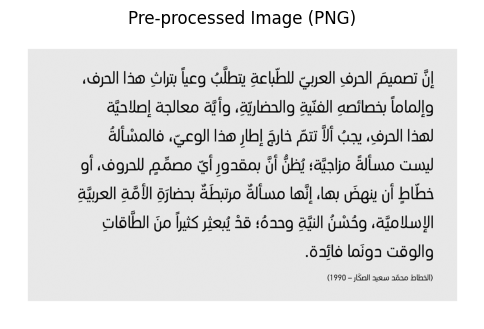

Extracted Text:
 إن تصمية الحرفي العربي للطبا عة يتصلب وعياً بتراث هذا الحرف,
والماماً بخصائصو الفتيخ والمضارية. وأئية معالجة إصلاحية
لهذا الحري, يجث ألاً تتق خارج إطار هذا الوعي, فالمشألة
ليسن مسألة مزاجيّة؛ يظل أن بمقدور أي مصقج للحروف, أو
خطاط أن ينهض بها, إنها مسألة مرتبطة بحضارة الأممذ العربية
والوقت دوكما فائدة.

(الخطاط محقد سعيد الصكًار 1990)



'إن تصمية الحرفي العربي للطبا عة يتصلب وعياً بتراث هذا الحرف,\nوالماماً بخصائصو الفتيخ والمضارية. وأئية معالجة إصلاحية\nلهذا الحري, يجث ألاً تتق خارج إطار هذا الوعي, فالمشألة\nليسن مسألة مزاجيّة؛ يظل أن بمقدور أي مصقج للحروف, أو\nخطاط أن ينهض بها, إنها مسألة مرتبطة بحضارة الأممذ العربية\nوالوقت دوكما فائدة.\n\n(الخطاط محقد سعيد الصكًار 1990)\n'

In [ ]:
testModel("https://mir-s3-cdn-cf.behance.net/project_modules/max_1200/234bc0543709.563b3dc793b35.png", "Arabic_Text_Extractor", "/content/tessdata")

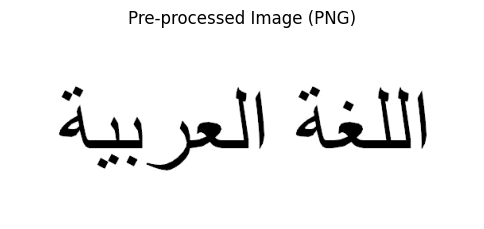

Extracted Text:
 اللغة العربية



'اللغة العربية\n'

In [ ]:
testModel("https://mpcabd.xyz/wp-content/uploads/2012/05/arabic-3.png", "Arabic_Text_Extractor", "/content/tessdata")

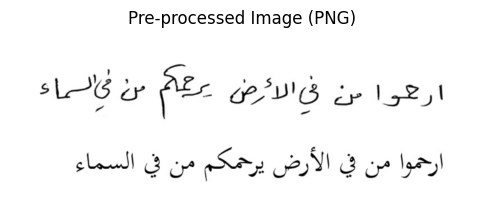

Extracted Text:
 ارموا من في الأرض يرحمكم من في السماء



'ارموا من في الأرض يرحمكم من في السماء\n'

In [ ]:
testModel("https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs10032-019-00339-8/MediaObjects/10032_2019_339_Fig1_HTML.png", "Arabic_Text_Extractor", "/content/tessdata")